In [12]:
import pandas as pd
import os

# Read the combined CSV file
residuals_data = pd.read_csv(os.path.join('..', 'assets', 'combined_daily_ridership_residuals.csv'))

# Convert 'Date' column to datetime if it exists
if 'Date' in residuals_data.columns:
    residuals_data['Date'] = pd.to_datetime(residuals_data['Date'])


In [14]:
# Trim off data older than 2022-02-01
start_date = pd.to_datetime('2022-02-01')

# Remove rows before start_date
residuals_data = residuals_data[residuals_data['Date'] >= start_date]

print(f"Data trimmed to start from {start_date.strftime('%Y-%m-%d')}")

# Display the date range after trimming
date_range = residuals_data['Date']
print(f"Data range: {date_range.min().strftime('%Y-%m-%d')} to {date_range.max().strftime('%Y-%m-%d')}")


Data trimmed to start from 2022-02-01
Data range: 2022-02-01 to 2024-09-30


/var/folders/vz/n6q5ty6n0g10lysg2fb_28sr0000gn/T/ipykernel_47052/189486114.py:12: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


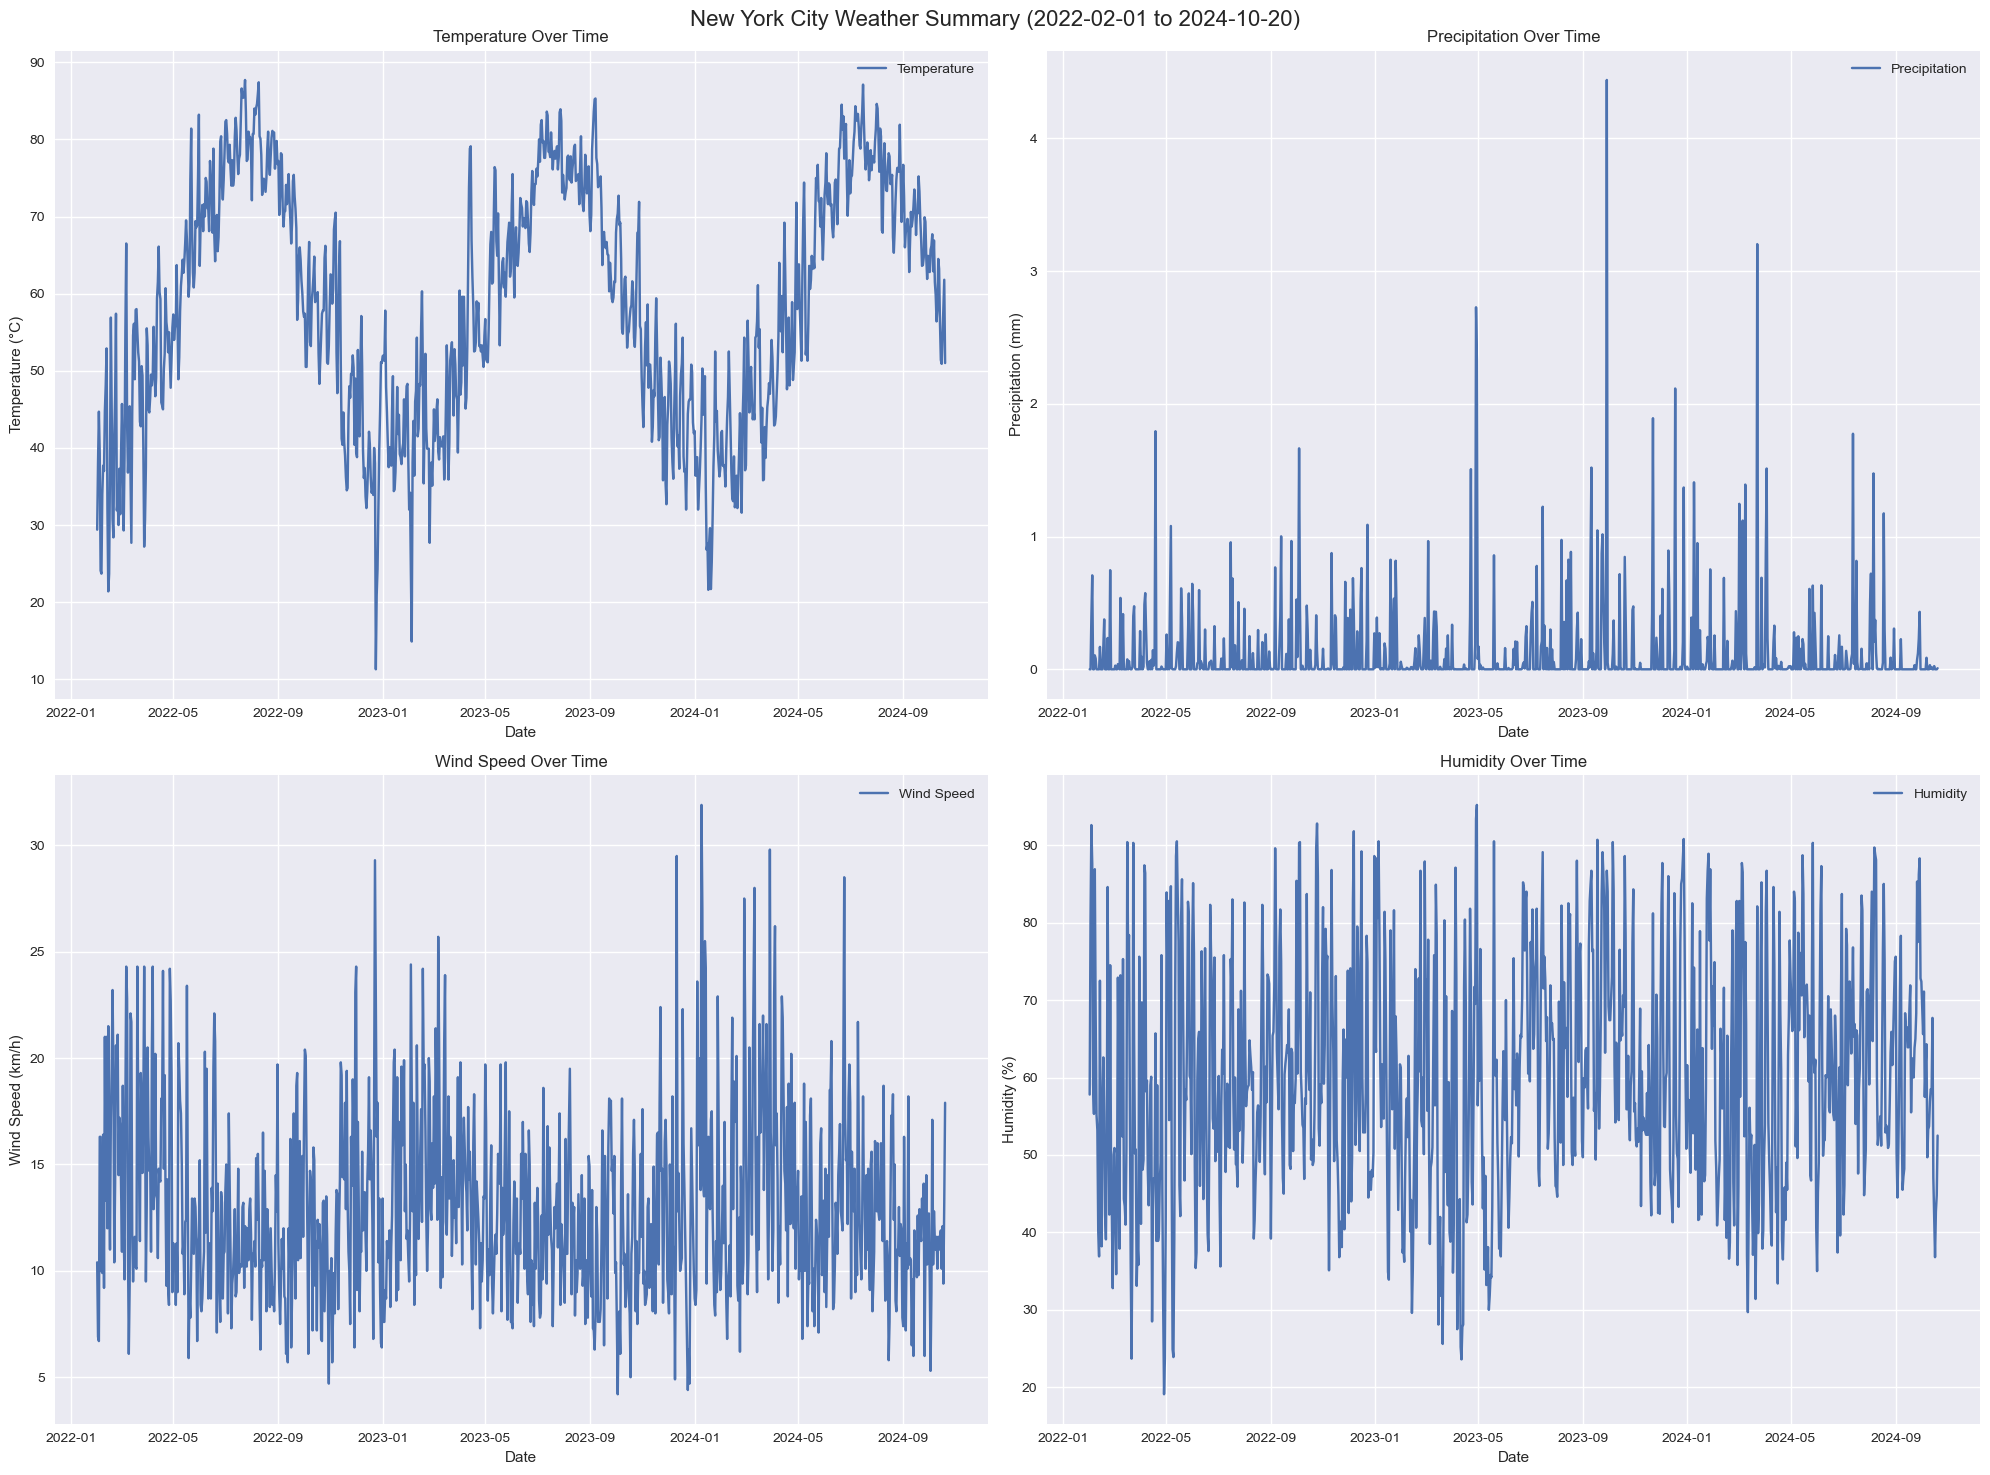

             temp      precip   windspeed    humidity
count  993.000000  993.000000  993.000000  993.000000
mean    58.925881    0.124896   13.063948   60.149648
std     15.468760    0.334507    4.296633   14.971079
min     11.300000    0.000000    4.200000   19.100000
25%     46.500000    0.000000   10.000000   49.400000
50%     59.600000    0.000000   12.300000   59.300000
75%     72.700000    0.065000   15.500000   71.300000
max     87.700000    4.441000   31.900000   95.200000


In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Read the weather data
weather_file = os.path.join('..', 'assets', 'new york city 2022-02-01 to 2024-10-20.csv')
weather_data = pd.read_csv(weather_file)

# Convert 'datetime' column to datetime type
weather_data['datetime'] = pd.to_datetime(weather_data['datetime'])

# Set the style for the plots
plt.style.use('seaborn')

# Create a figure with subplots
fig, axs = plt.subplots(2, 2, figsize=(20, 15))
fig.suptitle('New York City Weather Summary (2022-02-01 to 2024-10-20)', fontsize=16)

# Temperature plot
axs[0, 0].plot(weather_data['datetime'], weather_data['temp'], label='Temperature')
axs[0, 0].set_title('Temperature Over Time')
axs[0, 0].set_xlabel('Date')
axs[0, 0].set_ylabel('Temperature (°C)')
axs[0, 0].legend()

# Precipitation plot
axs[0, 1].plot(weather_data['datetime'], weather_data['precip'], label='Precipitation')
axs[0, 1].set_title('Precipitation Over Time')
axs[0, 1].set_xlabel('Date')
axs[0, 1].set_ylabel('Precipitation (mm)')
axs[0, 1].legend()

# Wind speed plot
axs[1, 0].plot(weather_data['datetime'], weather_data['windspeed'], label='Wind Speed')
axs[1, 0].set_title('Wind Speed Over Time')
axs[1, 0].set_xlabel('Date')
axs[1, 0].set_ylabel('Wind Speed (km/h)')
axs[1, 0].legend()

# Humidity plot
axs[1, 1].plot(weather_data['datetime'], weather_data['humidity'], label='Humidity')
axs[1, 1].set_title('Humidity Over Time')
axs[1, 1].set_xlabel('Date')
axs[1, 1].set_ylabel('Humidity (%)')
axs[1, 1].legend()

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

# Print summary statistics
print(weather_data[['temp', 'precip', 'windspeed', 'humidity']].describe())


In [19]:


# Merge weather data with combined residuals data
merged_data = pd.merge(residuals_data, weather_data, left_on='Date', right_on='datetime', how='inner')

# Drop the duplicate datetime column
merged_data = merged_data.drop('datetime', axis=1)

# Print the first few rows and info of the merged dataset
print(merged_data.head())
print(merged_data.info())


        Date  Subway Residual  Buses Residual  LIRR Residual           name  \
0 2022-02-01    176341.276018    77923.583782   21073.394905  new york city   
1 2022-02-02    213181.425930   117811.264863   18999.448843  new york city   
2 2022-02-03     35562.316563    31745.948922    -622.807386  new york city   
3 2022-02-04     -8321.644568   -17569.904254   -2035.662366  new york city   
4 2022-02-05     37326.302048    14097.163717    -335.892230  new york city   

   tempmax  tempmin  temp  feelslikemax  feelslikemin  ...  solarenergy  \
0     35.2     22.2  29.4          34.5          14.0  ...         12.1   
1     45.2     31.5  38.1          44.5          26.8  ...          7.3   
2     49.2     41.4  44.7          47.3          40.2  ...          2.0   
3     55.2     27.2  39.3          55.2          17.6  ...          1.4   
4     27.2     19.3  24.1          18.5           7.7  ...         12.8   

   uvindex  severerisk              sunrise               sunset  moonphas


Analyzing Subway


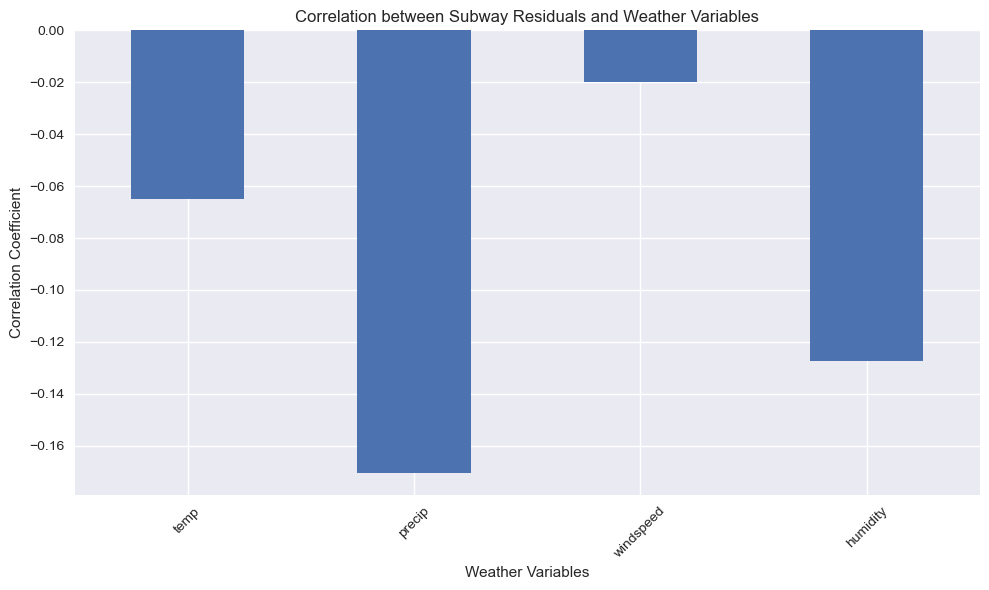

Correlations between Subway residuals and weather variables:
temp        -0.064780
precip      -0.170585
windspeed   -0.019902
humidity    -0.127220
Name: Subway Residual, dtype: float64


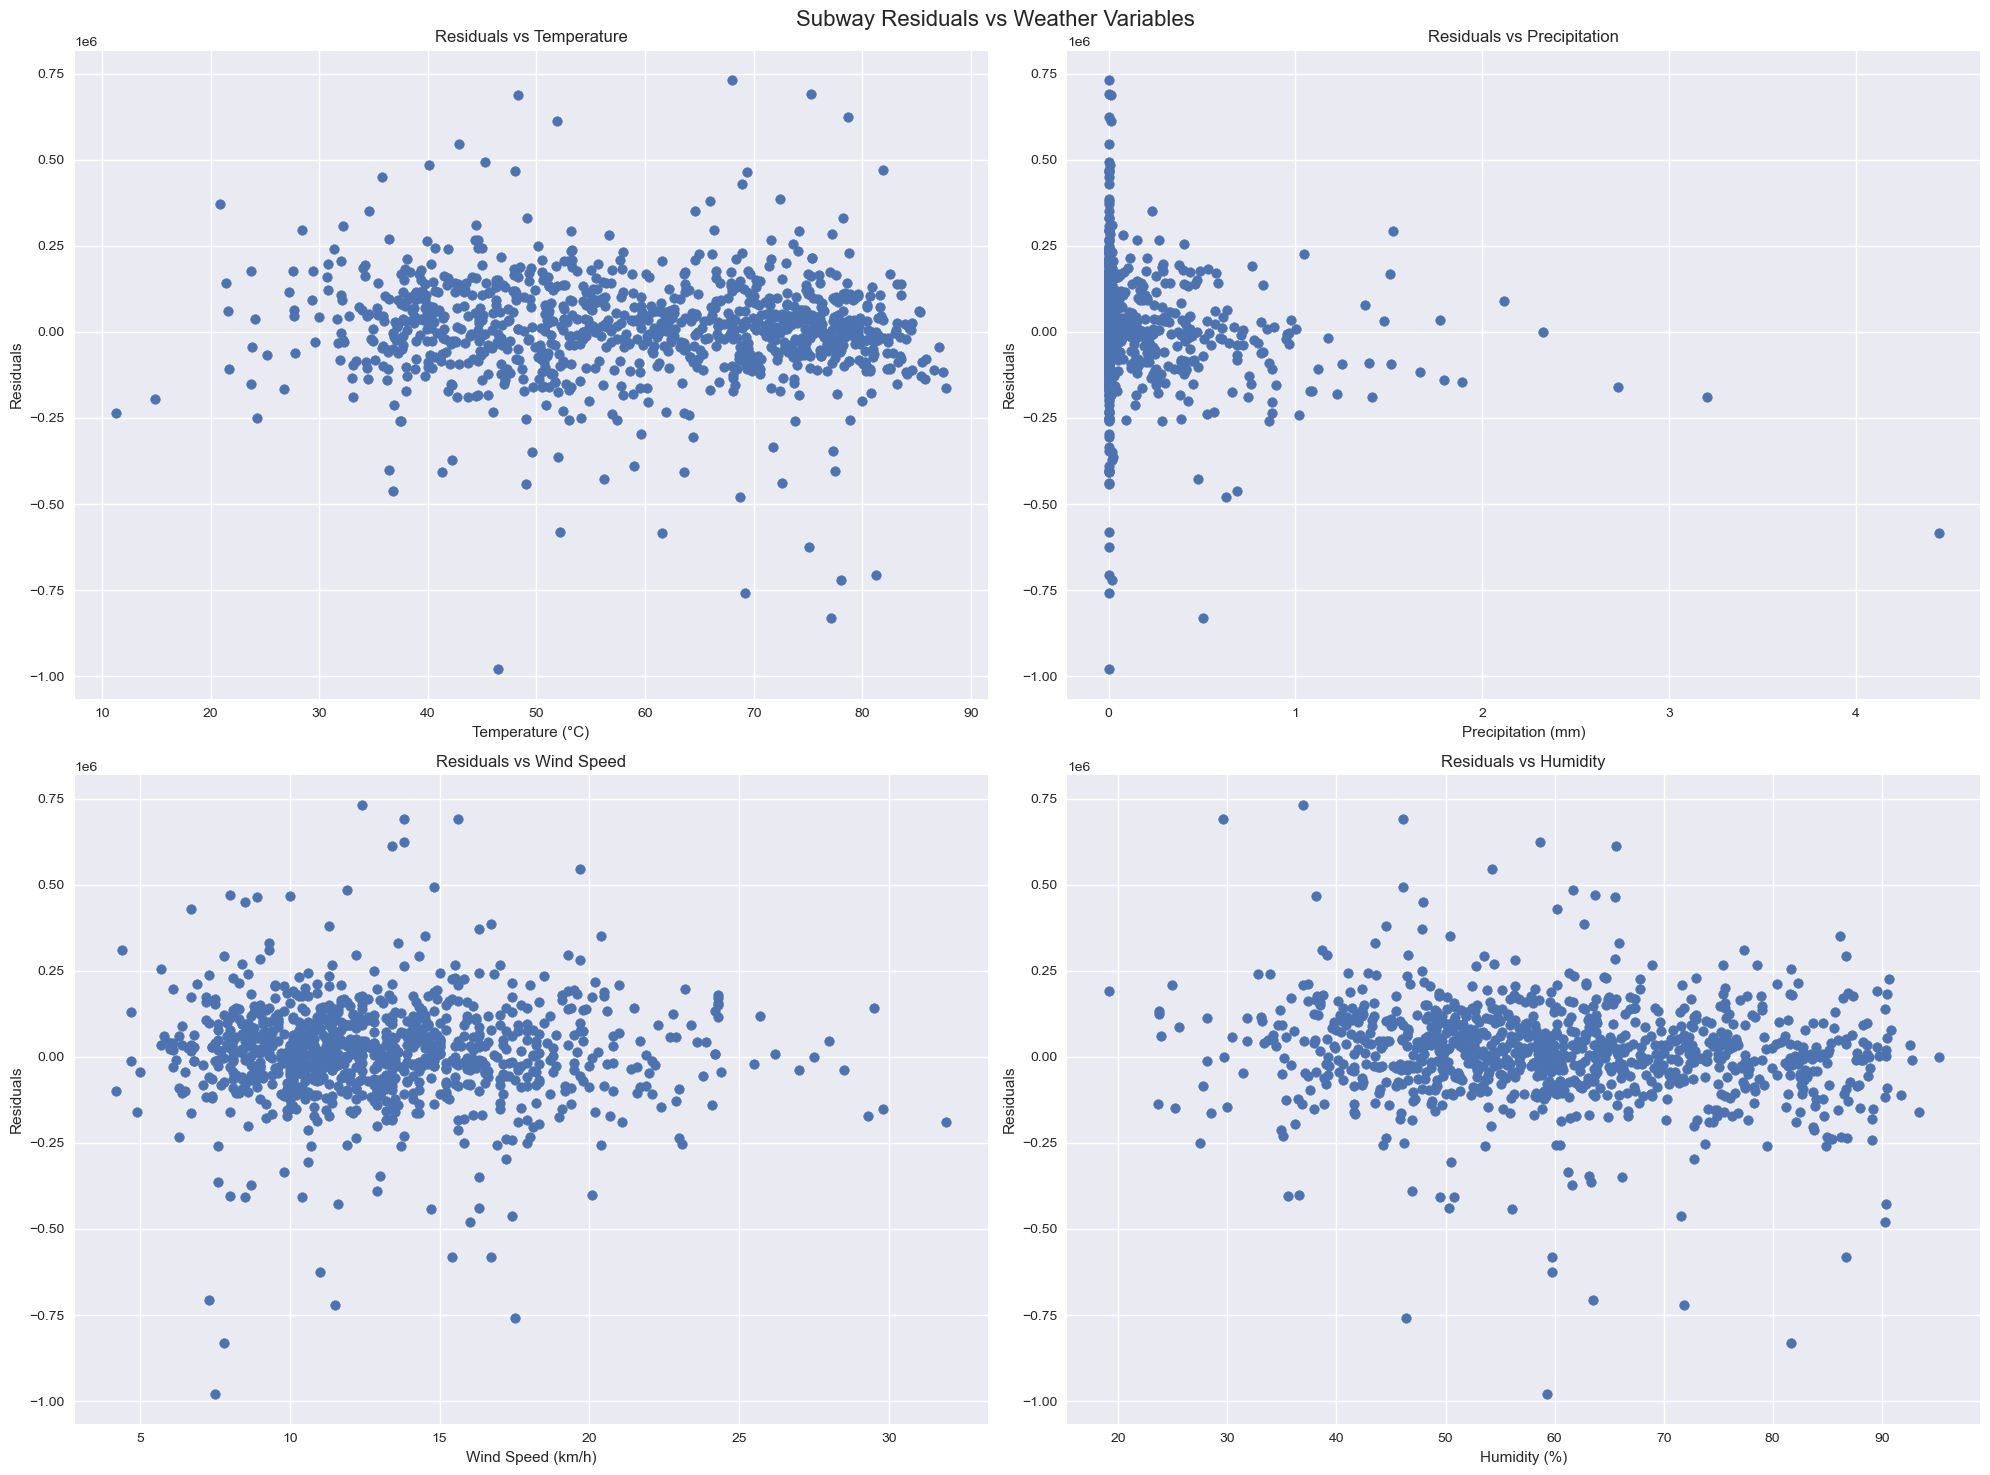


Analyzing Buses


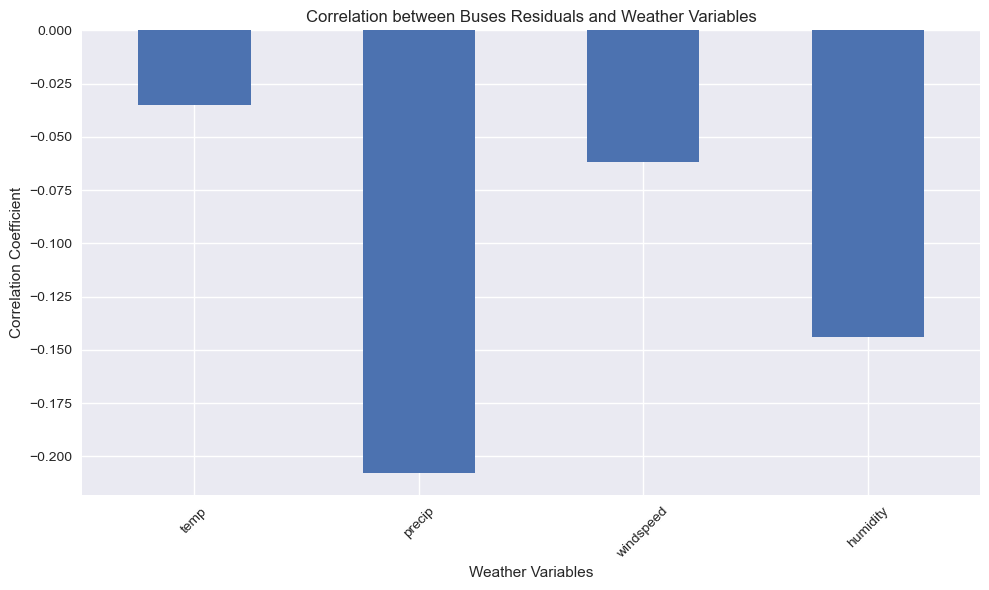

Correlations between Buses residuals and weather variables:
temp        -0.035068
precip      -0.207925
windspeed   -0.061733
humidity    -0.144017
Name: Buses Residual, dtype: float64


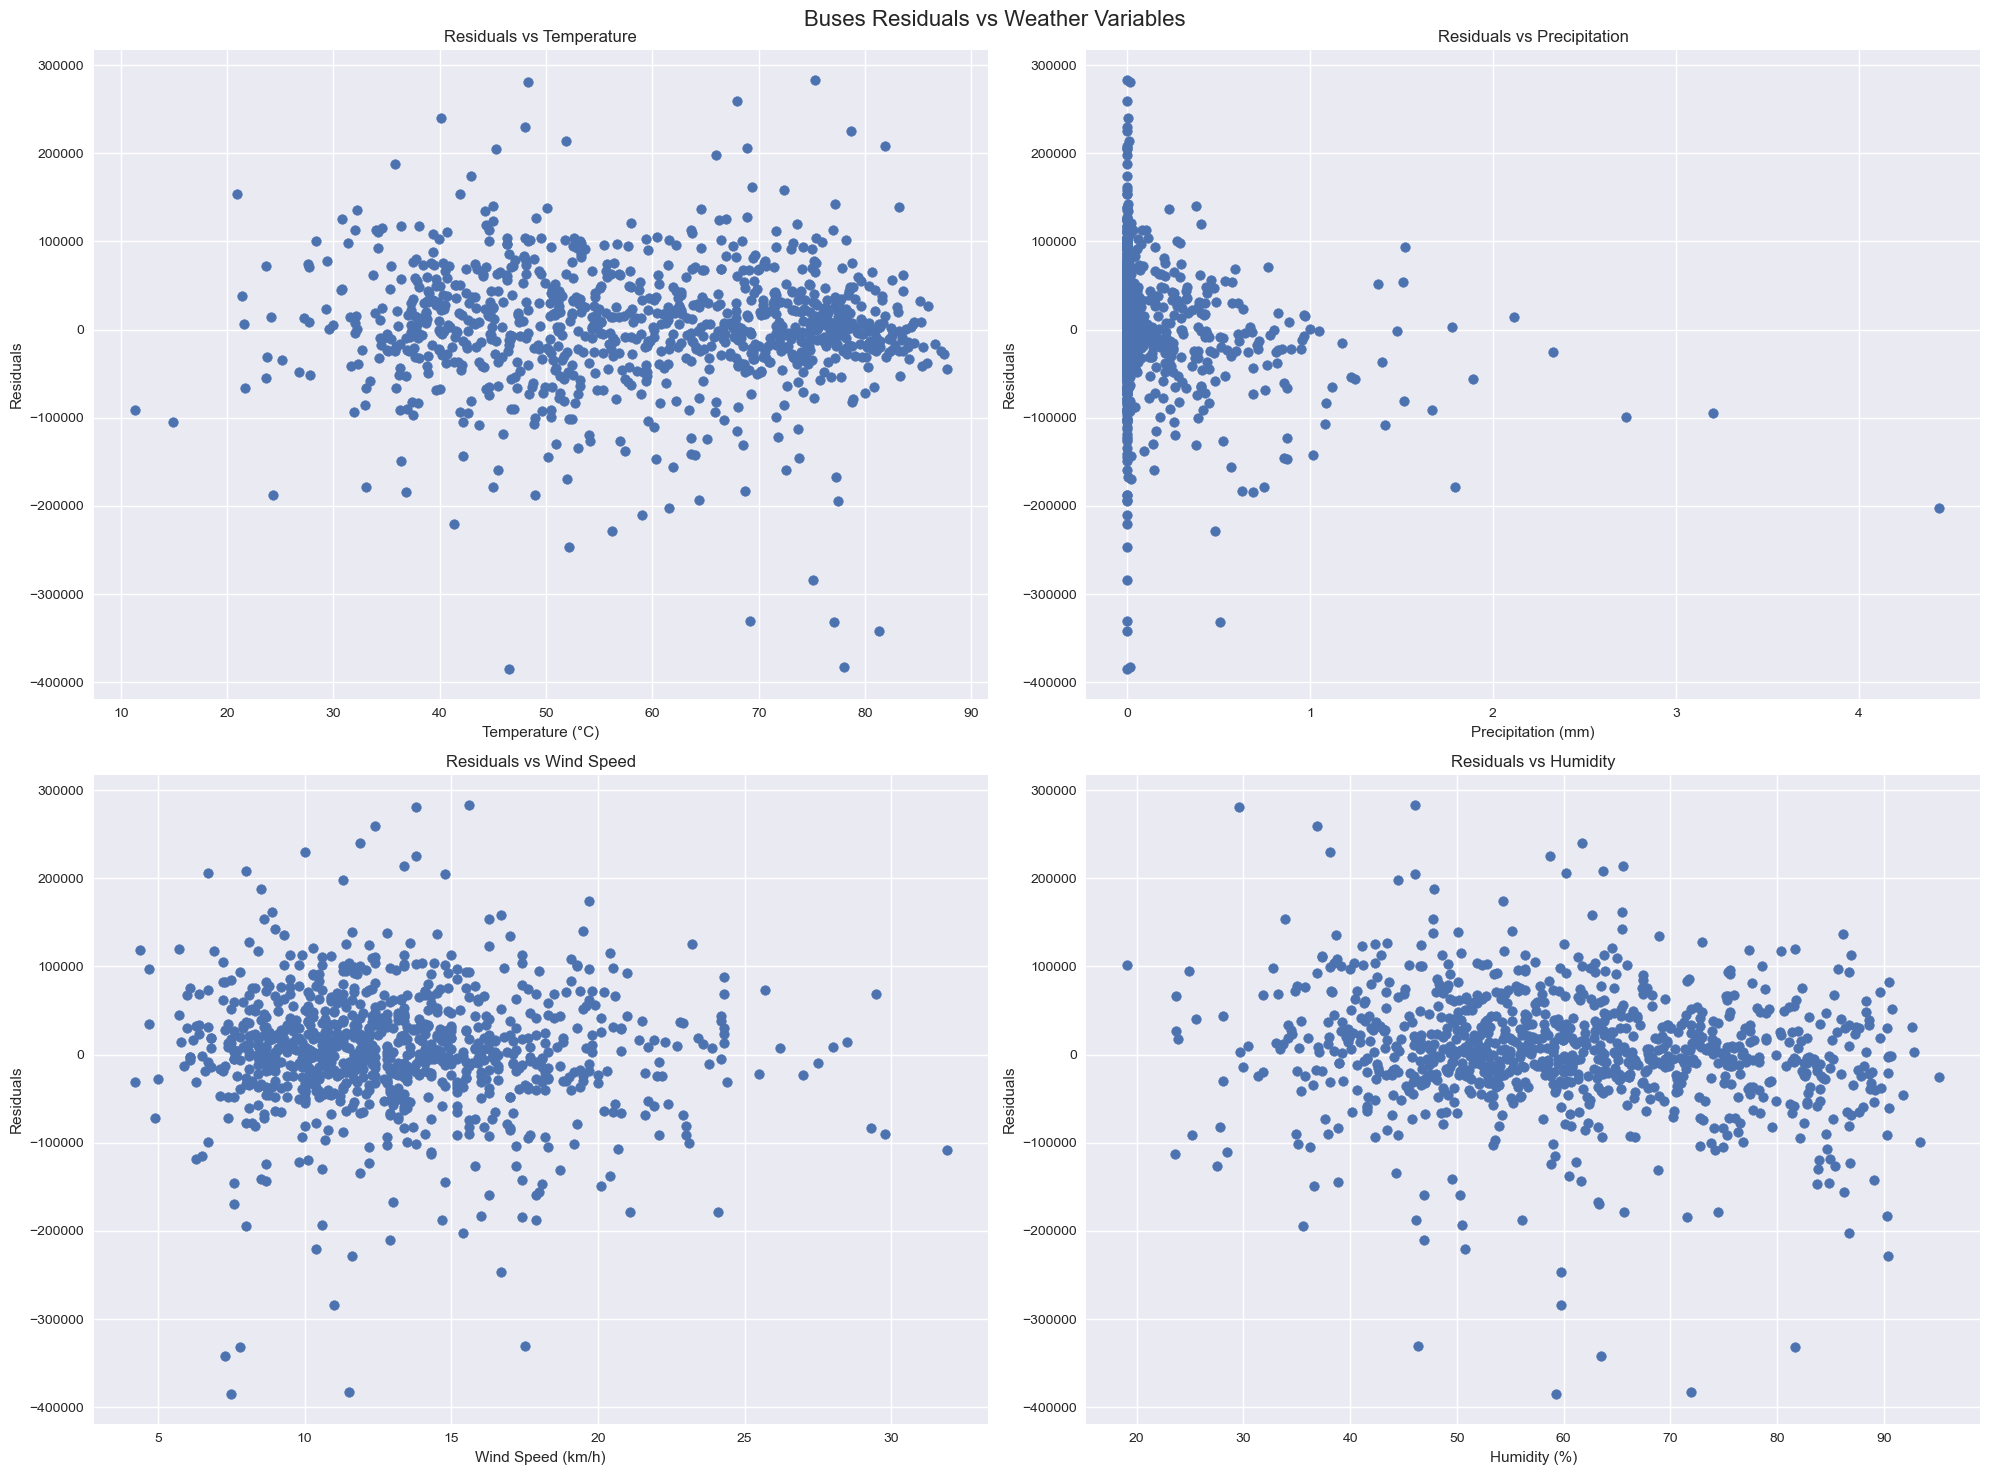


Analyzing LIRR


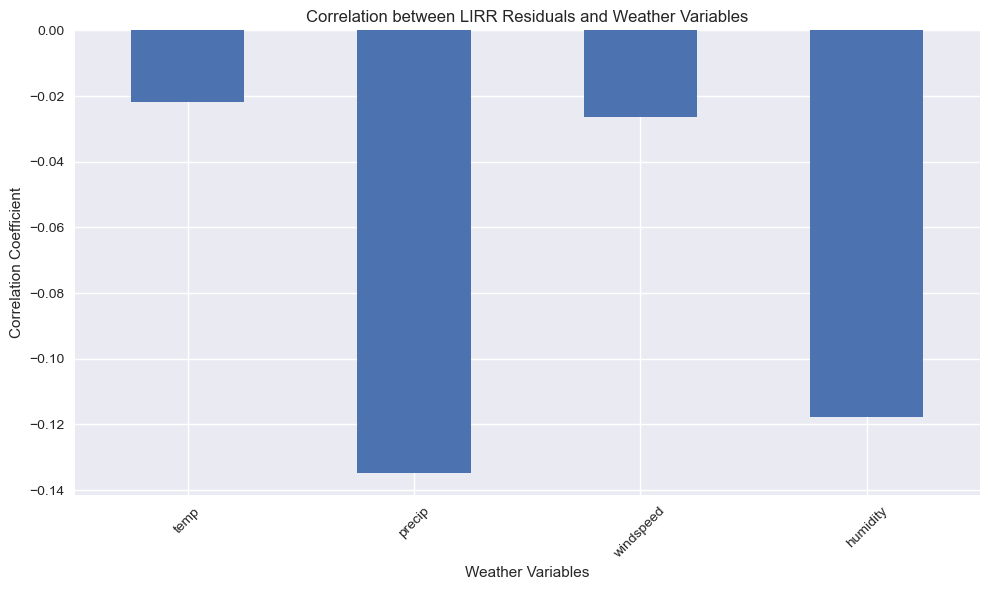

Correlations between LIRR residuals and weather variables:
temp        -0.021923
precip      -0.134851
windspeed   -0.026437
humidity    -0.117721
Name: LIRR Residual, dtype: float64


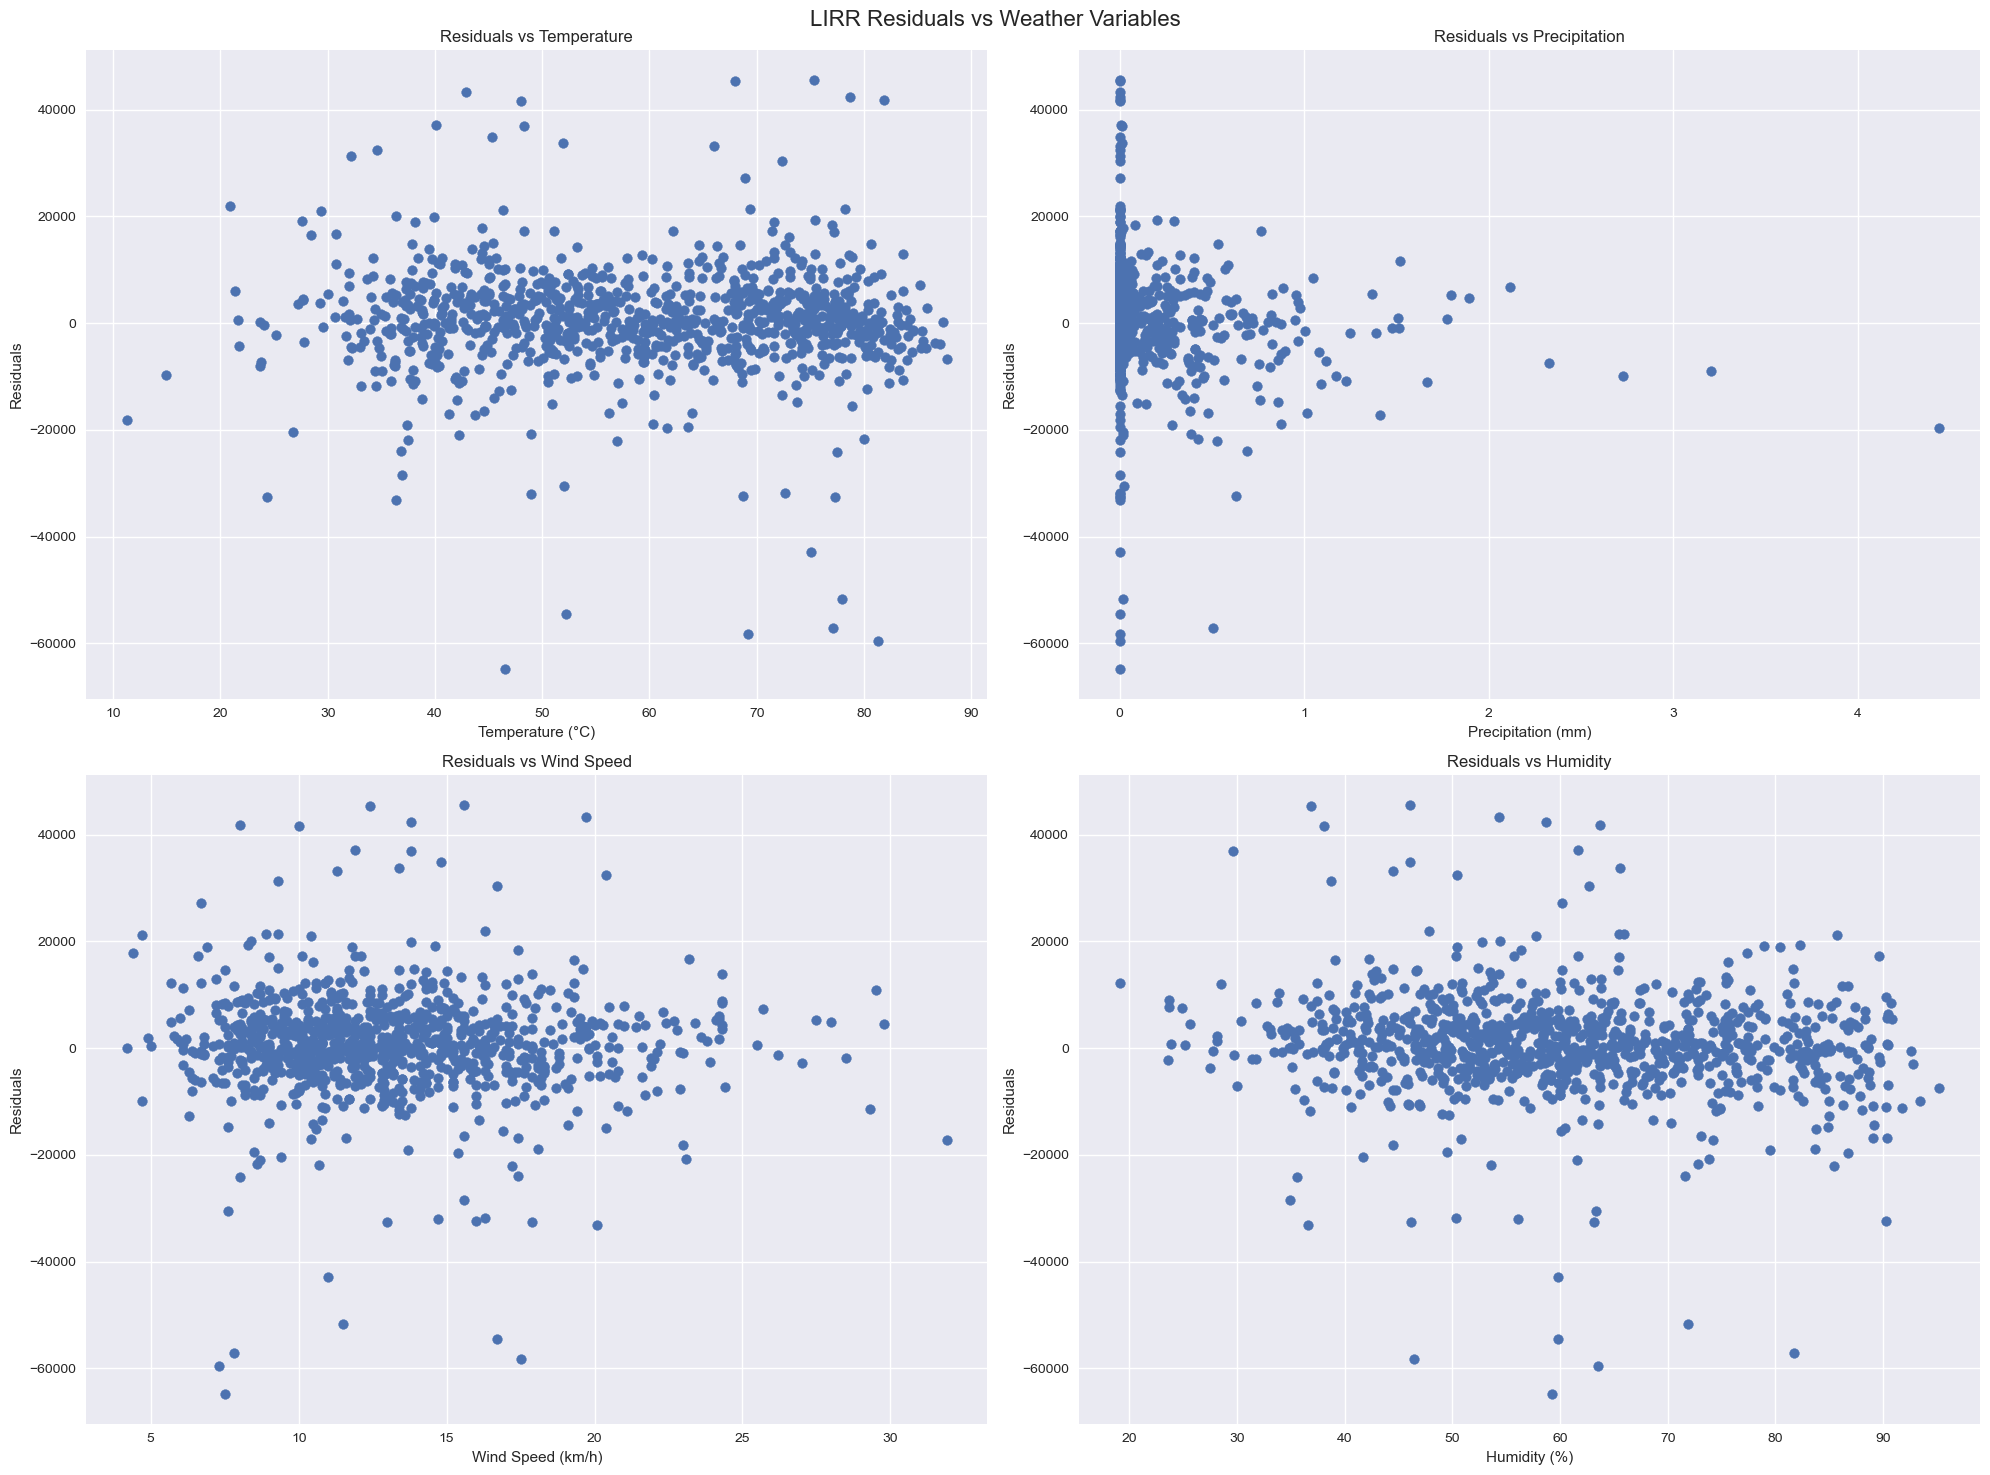

In [20]:
# List of ridership modes
ridership_modes = [
    'Subway',
    'Buses',
    'LIRR'
]

# Function to plot correlations and scatter plots for a given mode
def plot_correlations_and_scatter(mode):
    # Calculate correlations between residuals and weather variables
    correlations = merged_data[[f'{mode} Residual', 'temp', 'precip', 'windspeed', 'humidity']].corr()[f'{mode} Residual'].drop(f'{mode} Residual')
    
    # Create a bar plot of correlations
    plt.figure(figsize=(10, 6))
    correlations.plot(kind='bar')
    plt.title(f'Correlation between {mode} Residuals and Weather Variables')
    plt.xlabel('Weather Variables')
    plt.ylabel('Correlation Coefficient')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    
    # Print the correlation values
    print(f"Correlations between {mode} residuals and weather variables:")
    print(correlations)
    
    # Scatter plots for each weather variable
    fig, axs = plt.subplots(2, 2, figsize=(20, 15))
    fig.suptitle(f'{mode} Residuals vs Weather Variables', fontsize=16)
    
    axs[0, 0].scatter(merged_data['temp'], merged_data[f'{mode} Residual'])
    axs[0, 0].set_title('Residuals vs Temperature')
    axs[0, 0].set_xlabel('Temperature (°C)')
    axs[0, 0].set_ylabel('Residuals')
    
    axs[0, 1].scatter(merged_data['precip'], merged_data[f'{mode} Residual'])
    axs[0, 1].set_title('Residuals vs Precipitation')
    axs[0, 1].set_xlabel('Precipitation (mm)')
    axs[0, 1].set_ylabel('Residuals')
    
    axs[1, 0].scatter(merged_data['windspeed'], merged_data[f'{mode} Residual'])
    axs[1, 0].set_title('Residuals vs Wind Speed')
    axs[1, 0].set_xlabel('Wind Speed (km/h)')
    axs[1, 0].set_ylabel('Residuals')
    
    axs[1, 1].scatter(merged_data['humidity'], merged_data[f'{mode} Residual'])
    axs[1, 1].set_title('Residuals vs Humidity')
    axs[1, 1].set_xlabel('Humidity (%)')
    axs[1, 1].set_ylabel('Residuals')
    
    plt.tight_layout()
    plt.show()

# Analyze correlations for each ridership mode
for mode in ridership_modes:
    print(f"\nAnalyzing {mode}")
    plot_correlations_and_scatter(mode)
